<a href="https://colab.research.google.com/github/farahshahata/NLP/blob/master/Multi_class_Sentiment_Analysis_using_Deep_Learning_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Multi-class Sentiment Analysis using Deep Learning using keras

In [73]:

# Import the numpy library to work with and manipulate the data
import numpy as np
# Import the pandas library to read our dataset
import pandas as pd

import nltk
import random
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [0]:

import matplotlib.pyplot as plt
import seaborn as sns
#%matplotlib inline

from nltk.tokenize import TweetTokenizer
import datetime

from scipy import stats
from scipy.sparse import hstack, csr_matrix

# Get the train/test split package from sklearn for preparing our dataset to
# train and test the model with
from sklearn.model_selection import train_test_split, cross_val_score

from collections import Counter
from nltk.corpus import stopwords
from nltk.util import ngrams
from sklearn.feature_extraction.text import TfidfVectorizer



## Import data

In [0]:


url="https://raw.githubusercontent.com/cacoderquan/Sentiment-Analysis-on-the-Rotten-Tomatoes-movie-review-dataset/master/train.tsv"
data = pd.read_csv(url, sep='\t') 



In [76]:

data.head(10)

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2
5,6,1,of escapades demonstrating the adage that what...,2
6,7,1,of,2
7,8,1,escapades demonstrating the adage that what is...,2
8,9,1,escapades,2
9,10,1,demonstrating the adage that what is good for ...,2


## Splitting the dataset into train and test

In [0]:
train, test = train_test_split(data, test_size=0.3, random_state=2003)

In [78]:
data['Sentiment'].unique()

array([1, 2, 3, 4, 0])

In [79]:
all_data = pd.DataFrame(data,
                            columns=['Phrase', 'Sentiment'])
print(all_data)

                                                   Phrase  Sentiment
0       A series of escapades demonstrating the adage ...          1
1       A series of escapades demonstrating the adage ...          2
2                                                A series          2
3                                                       A          2
4                                                  series          2
...                                                   ...        ...
156055                                          Hearst 's          2
156056                          forced avuncular chortles          1
156057                                 avuncular chortles          3
156058                                          avuncular          2
156059                                           chortles          2

[156060 rows x 2 columns]


In [80]:
data.describe()

,PhraseId,SentenceId,Sentiment
count,156060.000000,156060.000000,156060.000000
mean,78030.500000,4079.732744,2.063578
std,45050.785842,2502.764394,0.893832
min,1.000000,1.000000,0.000000
25%,39015.750000,1861.750000,2.000000
50%,78030.500000,4017.000000,2.000000
75%,117045.250000,6244.000000,3.000000
max,156060.000000,8544.000000,4.000000


In [81]:
data.shape


(156060, 4)

In [82]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156060 entries, 0 to 156059
Data columns (total 4 columns):
PhraseId      156060 non-null int64
SentenceId    156060 non-null int64
Phrase        156060 non-null object
Sentiment     156060 non-null int64
dtypes: int64(3), object(1)
memory usage: 4.8+ MB


## Cleaning the data

In [0]:

from nltk.tokenize import word_tokenize
from nltk import FreqDist
from nltk.stem import SnowballStemmer,WordNetLemmatizer
stemmer=SnowballStemmer('english')
lemma=WordNetLemmatizer()
from string import punctuation
import re

In [0]:
# vectorizer = TfidfVectorizer(ngram_range=(1,2),tokenizer=tokenizer.tokenize)
# X = vectorizer.fit_transform(df['cleaned'])

In [0]:

def clean_review(review_col):
    review_corpus=[]
    for i in range(0,len(review_col)):
        review=str(review_col[i])
        review=re.sub('[^a-zA-Z]',' ',review)
        
        review=[lemma.lemmatize(w) for w in word_tokenize(str(review).lower())]
        review=' '.join(review)
        review_corpus.append(review)
    return review_corpus

In [86]:
#def test123:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer, LancasterStemmer
porter = PorterStemmer()
lancaster=LancasterStemmer()
wordnet_lemmatizer = WordNetLemmatizer()
stopwords_en = stopwords.words("english")
punctuations="?:!.,;'\"-()"

#parameters to adjust to see the impact on outcome
remove_stopwords = True
useStemming = True
useLemma = False
removePuncs = True

documents = train.Phrase.values

for l in range(len(documents)):
  tmpReview = []
  for w in word_tokenize(documents[l]):
    newWord = w
    if remove_stopwords and (w in stopwords_en):
      continue
    if removePuncs and (w in punctuations):
      continue
    if useStemming:
      #newWord = porter.stem(newWord)
      newWord = lancaster.stem(newWord)
    if useLemma:
      newWord = wordnet_lemmatizer.lemmatize(newWord)
    tmpReview.append(newWord)
  documents[l] = (' '.join(tmpReview))
print(documents[2])

fan gross-out comedy


In [87]:

train['clean_review']=clean_review(train.Phrase.values)
train.head()


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,PhraseId,SentenceId,Phrase,Sentiment,clean_review
13718,13719,590,ag,2,ag
91191,91192,4744,gorg ep,4,gorg ep
97160,97161,5079,fan gross-out comedy,2,fan gross out comedy
143983,143984,7816,the filmmak ascend lit olymp art world,4,the filmmak ascend lit olymp art world
37501,37502,1781,twist mystery,2,twist mystery


In [88]:
np.array(train).shape

(109242, 5)

In [89]:
# Apply to test data
test['clean_review']=clean_review(test.Phrase.values)
test.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,PhraseId,SentenceId,Phrase,Sentiment,clean_review
13510,13511,581,veteran,3,veteran
61932,61933,3132,many definitions,2,many definition
82549,82550,4261,a worthwhile glimpse,3,a worthwhile glimpse
137718,137719,7453,past Seagal films,2,past seagal film
121990,121991,6539,banal script,1,banal script


## Processing data




In [0]:
text = ' '.join(train.loc[train.Sentiment == 4, 'Phrase'].values)
text_trigrams = [i for i in ngrams(text.split(), 3)]

In [0]:
text_bigrams = [i for i in ngrams(text.split(), 2)]

In [92]:
Counter(text_bigrams).most_common(5)

[(('it', "'s"), 65),
 (("'s", 'best'), 54),
 (('film', "'s"), 46),
 (('on', 'best'), 43),
 (('rom', 'comedy'), 40)]

In [93]:
data.describe()

,PhraseId,SentenceId,Sentiment
count,156060.000000,156060.000000,156060.000000
mean,78030.500000,4079.732744,2.063578
std,45050.785842,2502.764394,0.893832
min,1.000000,1.000000,0.000000
25%,39015.750000,1861.750000,2.000000
50%,78030.500000,4017.000000,2.000000
75%,117045.250000,6244.000000,3.000000
max,156060.000000,8544.000000,4.000000


In [94]:
print("Total number of sentences: " + str(data['SentenceId'][-1:].values))
print("Total number of Phrase: " + str(data['PhraseId'][-1:].values))


Total number of sentences: [8544]
Total number of Phrase: [156060]


In [95]:
Counter(text_trigrams).most_common(5)

[(('on', 'year', "'s"), 24),
 (('year', "'s", 'best'), 21),
 (('good', 'act', 'good'), 15),
 (("'s", 'best', 'film'), 15),
 (('movy', 'i', "'ve"), 13)]

In [0]:
# Get number of unique sentences
numSentences = data['SentenceId'].max()

In [0]:
# extract full sentences only from the dataset
fullSentences = []
curSentence = 0
for i in range(data.shape[0]):
  if data['SentenceId'][i]> curSentence:
    fullSentences.append((data['Phrase'][i], data['Sentiment'][i]))
    curSentence = curSentence +1

In [98]:
len(fullSentences)

8544

In [99]:
#Tokenize the data train and test
tokenizer = TweetTokenizer()
vectorizer = TfidfVectorizer(ngram_range=(1, 2), tokenizer=tokenizer.tokenize)
full_text = list(train['clean_review'].values) + list(test['clean_review'].values)
vectorizer.fit(full_text)
train_vectorized = vectorizer.transform(train['clean_review'])
test_vectorized = vectorizer.transform(test['clean_review'])
test1 = test['clean_review']

y = train['Sentiment']

/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:507: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"


In [0]:
#Tokenize the data train and test with 3-gram
#tokenizer = TweetTokenizer()
#vectorizer3 = TfidfVectorizer(ngram_range=(1, 3), tokenizer=tokenizer.tokenize)
#full_text = list(train['clean_review'].values) + list(test['clean_review'].values)
#vectorizer3.fit(full_text)
#train_vectorized3 = vectorizer3.transform(train['clean_review'])
#test_vectorized3 = vectorizer3.transform(test['clean_review'])
#test1 = test['clean_review']
#y = train['Sentiment']

In [101]:
# Check class imbalance in tokenized sentences
data['Sentiment'].value_counts()

2    79582
3    32927
1    27273
4     9206
0     7072
Name: Sentiment, dtype: int64

## Splitting train dataset into train and valedation





In [102]:

from keras.utils import to_categorical
X = train['clean_review']
Y = to_categorical(train['Sentiment'].values)
print(Y)

[[0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0.]
 ...
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]]


In [0]:
from sklearn.model_selection import train_test_split
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.25, random_state=2003)

In [104]:

print(X_train.shape,Y_train.shape)
print(X_val.shape,Y_val.shape)

(81931,) (81931, 5)
(27311,) (27311, 5)


In [0]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical

## Counting number words and features

In [106]:
all_words=' '.join(X_train)
all_words=word_tokenize(all_words)
#print(all_words)
dist=FreqDist(all_words)

num_unique_word=len(dist)
num_unique_word
#X_train.head()

9481

## Number of words for each phrase/text

In [107]:
r_len=[]
for text in X_train:
    word=word_tokenize(text)
  #  print(text)
    l=len(word)
    r_len.append(l)
    
MAX_REVIEW_LEN=np.max(r_len)
MAX_REVIEW_LEN

32

In [108]:
#Setting features
max_features = num_unique_word
max_words = MAX_REVIEW_LEN
batch_size = 128
epochs = 50
num_classes=5
MAX_REVIEW_LEN

32

In [0]:
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, GRU, Embedding
from tensorflow.python.keras.optimizers import Adam
from tensorflow.python.keras.preprocessing.text import Tokenizer
from tensorflow.python.keras.preprocessing.sequence import pad_sequences

## Tokenizing the words

In [110]:
X_train

85120                                     fin work
131627                                         rat
65198              complet wash lrb pun intend rrb
78173                                         view
36846                           kiddy fantasy pabl
                            ...                   
155021                                cal work art
119255    level crud latest austin pow extravaganz
65844                                     app skil
19120                  toward maxim comfort famili
73183                                         nant
Name: clean_review, Length: 81931, dtype: object

In [0]:
tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(X_train)
X_train = tokenizer.texts_to_sequences(X_train)
X_val = tokenizer.texts_to_sequences(X_val)

X_test = tokenizer.texts_to_sequences(test1)
#X_test

In [112]:
np.array(X_train).shape

(81931,)

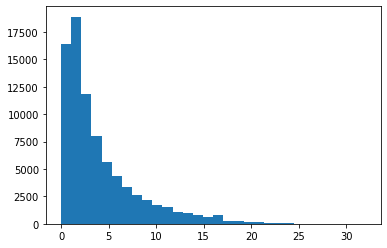

In [113]:
totalNumWords = [len(one_comment) for one_comment in X_train]
plt.hist(totalNumWords,bins = 30)
plt.show()

In [0]:
from keras.preprocessing import sequence,text
from keras.preprocessing.text import Tokenizer
from keras.models import Sequential
from keras.preprocessing.sequence import pad_sequences

## Sequence padding

In [115]:
np.array(X_train).shape

(81931,)

In [116]:

from keras.preprocessing import sequence,text
from keras.preprocessing.text import Tokenizer
from keras.models import Sequential
from keras.preprocessing.sequence import pad_sequences
X_train = sequence.pad_sequences(X_train, maxlen=max_words)
X_val = sequence.pad_sequences(X_val, maxlen=max_words)
X_test = sequence.pad_sequences(X_test, maxlen=max_words)
#print(X_train.shape,X_val.shape)
X_test

array([[   0,    0,    0, ...,    0,    0,    0],
       [   0,    0,    0, ...,    0,    0,   63],
       [   0,    0,    0, ...,    0,    0,   10],
       ...,
       [   0,    0,    0, ...,   10,  198, 2288],
       [   0,    0,    0, ...,    0,    0,    1],
       [   0,    0,    0, ...,    0, 4512, 1005]], dtype=int32)

In [117]:
print(data.iloc[0]['Phrase'],'Sentiment - ',data.iloc[0]['Sentiment'])

A series of escapades demonstrating the adage that what is good for the goose is also good for the gander , some of which occasionally amuses but none of which amounts to much of a story . Sentiment -  1


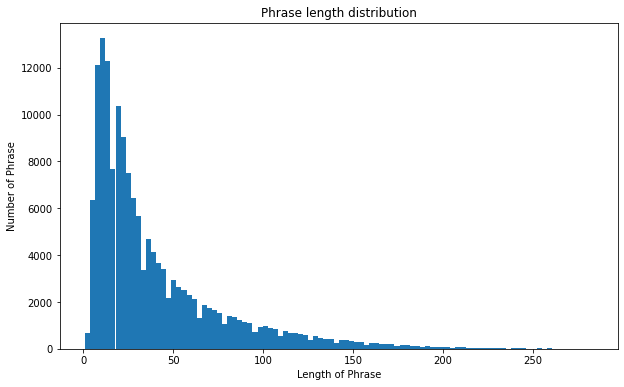

In [118]:
# Now, let's see the average number of words per Phrase
plt.figure(figsize=(10, 6))
plt.hist([len(sample) for sample in list(data['Phrase'])], 100)
plt.xlabel('Length of Phrase')
plt.ylabel('Number of Phrase')
plt.title('Phrase length distribution')
plt.show()

In [0]:
from keras.preprocessing import sequence,text
from keras.preprocessing.text import Tokenizer
from keras.models import Sequential
from keras.layers import Dense,Dropout,Embedding,LSTM,Conv1D,GlobalMaxPooling1D,Flatten,MaxPooling1D,GRU,SpatialDropout1D,Bidirectional
from keras.callbacks import EarlyStopping
from keras.utils import to_categorical
from keras.losses import categorical_crossentropy
from keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,f1_score
import matplotlib.pyplot as plt

## CNN Model with softmax activation 

In [0]:
from keras.layers import Input, Dense, Embedding, Flatten
from keras.layers import SpatialDropout1D
from keras.layers.convolutional import Conv1D, MaxPooling1D
from keras.models import Sequential

In [0]:
model = Sequential()

# Input / Embdedding
model.add(Embedding(max_features, 150, input_length=max_words))

# CNN
model.add(SpatialDropout1D(0.2))
model.add(Conv1D(32, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))

model.add(Conv1D(64, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))

model.add(Flatten())
# Output layer
model.add(Dense(5, activation='softmax'))


In [0]:
from keras import backend as K

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))


In [123]:
model.summary()
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc',f1_m,precision_m, recall_m])
history=model.fit(X_train, Y_train, validation_data=(X_val, Y_val), epochs=epochs, batch_size=batch_size, verbose=1)

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 32, 150)           1422150   
_________________________________________________________________
spatial_dropout1d_4 (Spatial (None, 32, 150)           0         
_________________________________________________________________
conv1d_9 (Conv1D)            (None, 32, 32)            14432     
_________________________________________________________________
max_pooling1d_3 (MaxPooling1 (None, 16, 32)            0         
_________________________________________________________________
conv1d_10 (Conv1D)           (None, 16, 64)            6208      
_________________________________________________________________
max_pooling1d_4 (MaxPooling1 (None, 8, 64)             0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 512)              

# Model evaluation

In [125]:
loss, accuracy, f1_score, precision, recall = model.evaluate(X_val, Y_val, batch_size=128)
print('test accuracy:', accuracy)
print('test loss:', loss)
print('test f1_score:', f1_score)
print('test precision:', precision)
print('test recall:', recall)

27311/27311 [==============================] - 1s 50us/step
test accuracy: 0.6108527699308984
test loss: 1.8238510752818955
test f1_score: 0.6090753041882982
test precision: 0.6167373683590449
test recall: 0.6016623338428753


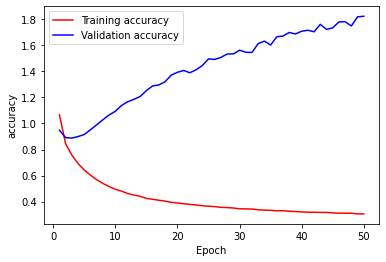

In [128]:
# Create count of the number of epochs
epoch_count = range(1, len(history.history['loss']) + 1)

plt.plot(epoch_count, history.history['loss'], 'r-')
plt.plot(epoch_count, history.history['val_loss'], 'b-')

plt.xlabel('Epoch')
plt.ylabel('accuracy')
plt.legend(['Training accuracy', 'Validation accuracy'])


plt.show()

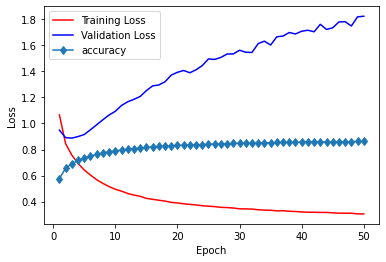

In [129]:

# Create count of the number of epochs
epoch_count = range(1, len(history.history['loss']) + 1)

plt.plot(epoch_count, history.history['loss'], 'r-')
plt.plot(epoch_count, history.history['val_loss'], 'b-')
plt.plot(epoch_count, history.history['acc'], 'd-')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validation Loss','accuracy'])


plt.show()

In [130]:
data['Phrase'].unique()

array(['A series of escapades demonstrating the adage that what is good for the goose is also good for the gander , some of which occasionally amuses but none of which amounts to much of a story .',
       'A series of escapades demonstrating the adage that what is good for the goose',
       'A series', ..., 'avuncular chortles', 'avuncular', 'chortles'],
      dtype=object)

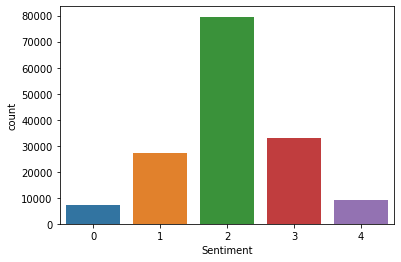

In [131]:
# Distribution of reviews is roughly balanced. 
sns.countplot(data['Sentiment'])
plt.show()


In [132]:
data['text_length'] = data['Phrase'].apply(len)
data[['Sentiment','text_length','Phrase']].head()

,Sentiment,text_length,Phrase
0,1,188,A series of escapades demonstrating the adage ...
1,2,77,A series of escapades demonstrating the adage ...
2,2,8,A series
3,2,1,A
4,2,6,series


In [133]:
data['text_length'].describe()


count    156060.000000
mean         40.217224
std          38.154130
min           1.000000
25%          14.000000
50%          26.000000
75%          53.000000
max         283.000000
Name: text_length, dtype: float64

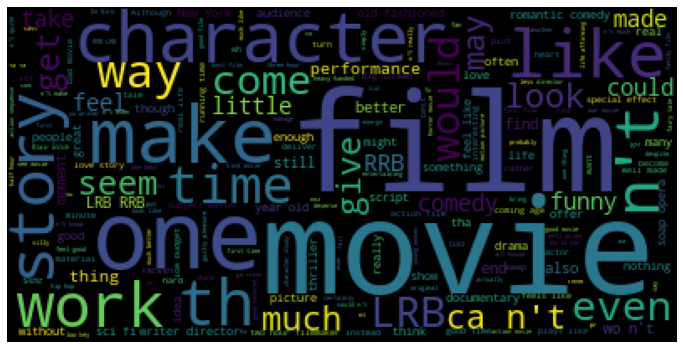

In [134]:
# word cloud
from nltk.corpus import stopwords
from wordcloud import WordCloud

text = data['Phrase'].to_string()
wordcloud = WordCloud(
        relative_scaling=0.5,
        stopwords=set(stopwords.words('english'))).generate(text)

plt.figure(figsize=(12,12))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

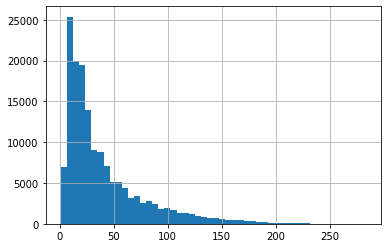

In [135]:
data['text_length'].hist(bins=50)


The facet grid function can be used to plot histograms and visualize if there are any relationships between review length and review sentiment.

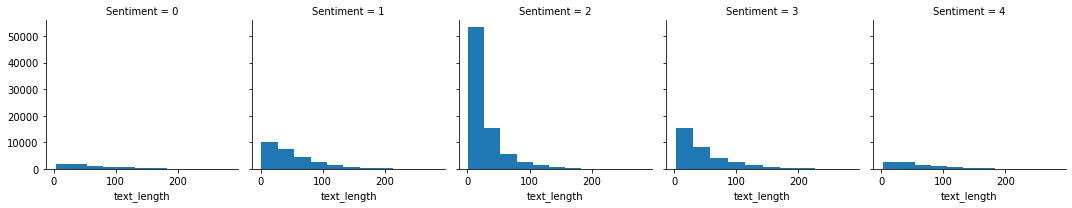

In [136]:
g = sns.FacetGrid(data,col='Sentiment')
g.map(plt.hist,'text_length')

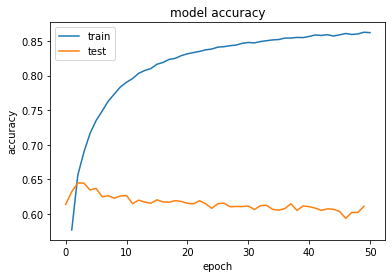

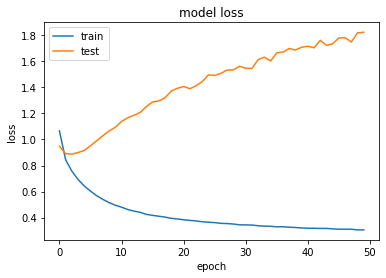

In [137]:
plt.plot(epoch_count, history.history['acc'])
plt.plot(history.history['val_acc'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc = 'upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc = 'upper left')
plt.show()

In [0]:

#Save the model
model.save('0873122_1dconv_reg.pt') 
